In [12]:
import pandas as pd
import numpy as np
import joblib
import os
import configparser as cp
from sqlalchemy import create_engine
import mysql.connector

from plotnine import *
os.getcwd()

'/home/ubuntu/projects/Stock_Price_Prediction'

In [2]:
config=cp.ConfigParser()
config.read('/home/ubuntu/certi/db_login.txt')
db_config=config['ivan_db']
engine=create_engine('mysql+mysqlconnector://{0:s}:{1:s}@{2:s}/{3:s}'.format(db_config['userid'],
                                                                             db_config['pwd'],
                                                                             db_config['hostname'],
                                                                             'STOCK_PRED'))

# Data Loading

df=pd.read_sql("""SELECT * 
                  FROM STOCK_PRED.ALL_STOCK_HIST 
                  WHERE DATE>=STR_TO_DATE('2020-01-01','%Y-%m-%d')
                  """,
              con=engine)
print(df.shape)
#joblib.dump(df,'/home/ubuntu/projects/Stock_Price_Prediction/data/stock_price_2020_2021.pkl')

In [10]:
df=joblib.load('/home/ubuntu/projects/Stock_Price_Prediction/data/stock_price_2020_2021.pkl')
print(df.shape)
print(df.REFRESH_DATE.min())
df.dtypes

(2141748, 9)
2021-08-15 00:00:00


Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
SE                      object
Stock                   object
REFRESH_DATE    datetime64[ns]
dtype: object

In [11]:
df.head(5)

,Date,Open,High,Low,Close,Volume,SE,Stock,REFRESH_DATE
0,2020-01-02,1.35,1.38,1.35,1.35,4300.0,NASDAQ,AACG,2021-08-15
1,2020-01-03,1.36,1.49,1.36,1.47,42000.0,NASDAQ,AACG,2021-08-15
2,2020-01-06,1.51,1.51,1.36,1.43,18700.0,NASDAQ,AACG,2021-08-15
3,2020-01-07,1.39,1.44,1.36,1.43,13700.0,NASDAQ,AACG,2021-08-15
4,2020-01-08,1.41,1.58,1.36,1.51,90900.0,NASDAQ,AACG,2021-08-15


## Checking

### NAs and Negative 

In [13]:
## NAs
pd.DataFrame({'vals':df.isnull().sum()}).loc[lambda x:x.vals>0]

,vals
Open,28
High,28
Low,28
Close,28
Volume,28


In [14]:
df.loc[df.Open.isnull(),:]

,Date,Open,High,Low,Close,Volume,SE,Stock,REFRESH_DATE
173008,2021-04-27,NaN,NaN,NaN,NaN,NaN,NASDAQ,BYRN,2021-08-15 00:00:00
184921,2021-08-02,NaN,NaN,NaN,NaN,NaN,NASDAQ,CBAN,2021-08-15 00:00:00
568978,2020-12-28,NaN,NaN,NaN,NaN,NaN,NASDAQ,KMPH,2021-08-15 00:00:00
606992,2021-08-02,NaN,NaN,NaN,NaN,NaN,NASDAQ,LMRK,2021-08-15 00:00:00
726841,2020-10-19,NaN,NaN,NaN,NaN,NaN,NASDAQ,NUWE,2021-08-15 00:00:00
1091882,2020-12-15,NaN,NaN,NaN,NaN,NaN,NASDAQ,VS,2021-08-15 00:00:00
1104711,2020-12-07,NaN,NaN,NaN,NaN,NaN,NASDAQ,WFCF,2021-08-15 00:00:00
1264735,2021-08-02,NaN,NaN,NaN,NaN,NaN,NYSE,BMO,2021-08-15 00:00:00
1291484,2021-08-02,NaN,NaN,NaN,NaN,NaN,NYSE,CAG,2021-08-15 00:00:00
1294414,2021-08-02,NaN,NaN,NaN,NaN,NaN,NYSE,CAPL,2021-08-15 00:00:00


In [15]:
## Negative
pd.DataFrame({'vals':df.select_dtypes(include=['float64']).apply(lambda x:(x<0).astype(int).sum())}).loc[lambda x:x.vals>0]

,vals
Open,304
High,304
Low,304
Close,304


In [16]:
df.loc[df.Open<0]

,Date,Open,High,Low,Close,Volume,SE,Stock,REFRESH_DATE
1173045,2020-01-02,-4.621460,-4.629507,-4.501654,-4.522218,6605000.0,NYSE,AIV,2021-08-15
1173046,2020-01-03,-4.507019,-4.614308,-4.496290,-4.593744,8263300.0,NYSE,AIV,2021-08-15
1173047,2020-01-06,-4.586591,-4.635765,-4.556193,-4.622354,16151000.0,NYSE,AIV,2021-08-15
1173048,2020-01-07,-4.600896,-4.623248,-4.549934,-4.562451,11878100.0,NYSE,AIV,2021-08-15
1173049,2020-01-08,-4.566028,-4.608943,-4.559770,-4.583015,9504100.0,NYSE,AIV,2021-08-15
...,...,...,...,...,...,...,...,...,...
1531440,2020-05-07,-0.881523,-0.881523,-0.769172,-0.806623,246900.0,NYSE,HCHC,2021-08-15
1531441,2020-05-08,-0.841192,-0.887285,-0.806623,-0.881523,264600.0,NYSE,HCHC,2021-08-15
1531442,2020-05-11,-0.913212,-0.988113,-0.898808,-0.916093,564700.0,NYSE,HCHC,2021-08-15
1531443,2020-05-12,-0.927616,-1.002517,-0.895927,-0.918974,658600.0,NYSE,HCHC,2021-08-15


## Spot checking 

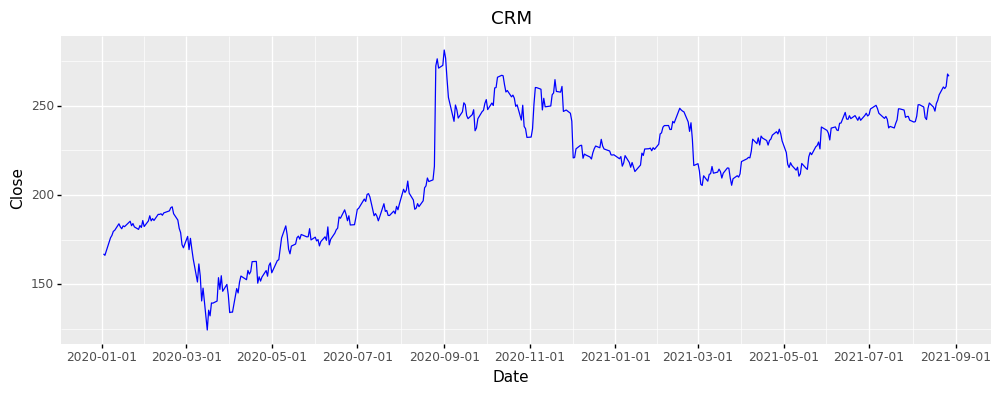

<ggplot: (8759667472080)>


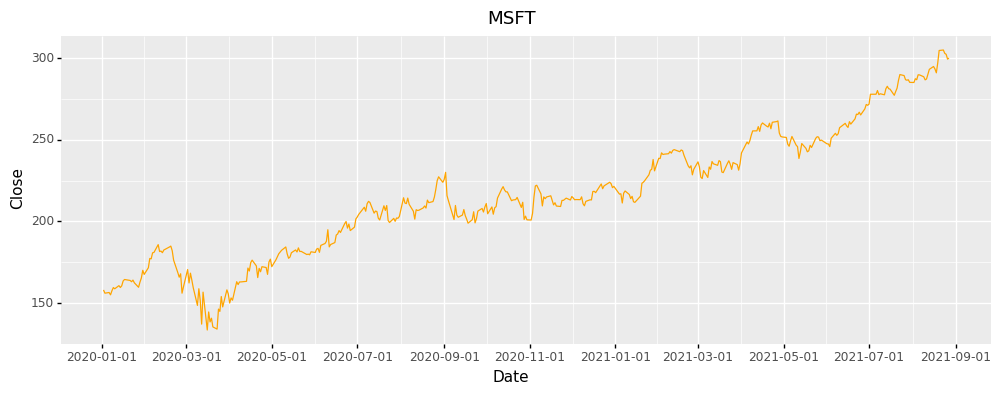

<ggplot: (8759665808192)>


In [19]:
crm_msft=df.loc[df.Stock.isin(['CRM','MSFT']),:]
# melt

print(
    ggplot(df.loc[df.Stock=='CRM',:],aes('Date','Close'))
    +geom_line(color='blue')
    +theme(figure_size=(12,4))
    +labs(title='CRM')
)
print(
    ggplot(df.loc[df.Stock=='MSFT',:],aes('Date','Close'))
    +geom_line(color='orange')
    +theme(figure_size=(12,4))
    +labs(title='MSFT')
)